In [1]:
import os
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = "../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'net_202001_15.net',
 'OD_bus',
 'net_202001_05.net',
 'net_202001_06.net',
 'origin_destination_train_201912.csv.xz',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'net_202001_22.net',
 'subzone_centroid.csv',
 'OD_201912_weekday.csv.xz',
 'origin_destination_bus_201911.csv.xz',
 'net_202001_19.net',
 'net_202001_18.net',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'net_202001_10.net',
 'OD_201911_weekend.csv.xz',
 'origin_destination_train_201911.csv.xz',
 'subzone_centroid_pos.json',
 'net_202001_21.net',
 'origin_destination_bus_202001.csv.xz',
 'OD_201912_weekend.csv.xz',
 'net_202001_07.net',
 'origin_destination_bus_201912.csv.xz',
 'net_202001_23.net',
 'region-2014',
 'train_station_wszone.shp',
 'net_202001_16.net',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001_weekday.csv.xz',
 'net_202001_20.net',
 'net_202001_1

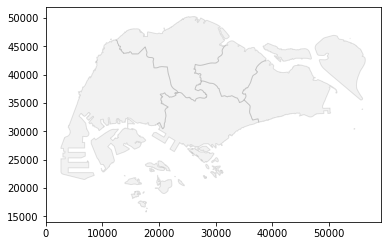

In [4]:
os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

In [6]:
df1 = pd.read_csv(os.path.join(data_dir, 'OD_202001_weekday.csv.xz'))
df1.head()

,ind,origin,destination,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,TAMPINES EAST,TAMPINES EAST,232925.0,1427066.0,2316704.0,1778107.0,1280905.0,1145098.0,1084878.0,...,1382846.0,1305843.0,1400255.0,1652029.0,2019632.0,1676532.0,1141877.0,984449.0,739684.0,391909.0
1,1,SENOKO NORTH,YISHUN CENTRAL,3560.0,14560.0,7020.0,6380.0,4740.0,4140.0,5820.0,...,10480.0,17540.0,22060.0,46820.0,55680.0,23640.0,16620.0,8300.0,4840.0,1940.0
2,2,FERNVALE,TRAFALGAR,2680.0,25980.0,19620.0,24980.0,14180.0,10240.0,8260.0,...,9060.0,10400.0,11820.0,18520.0,19040.0,12060.0,8360.0,7320.0,6780.0,3160.0
3,3,CHINATOWN,PORT,328.0,3482.0,1452.0,1084.0,1128.0,602.0,534.0,...,866.0,908.0,747.0,886.0,564.0,754.0,702.0,553.0,573.0,496.0
4,4,LAKESIDE,TAMAN JURONG,408.0,6854.0,12863.0,18283.0,7809.0,7015.0,6526.0,...,12956.0,23380.0,13425.0,15333.0,15933.0,8697.0,7677.0,4723.0,3355.0,1720.0


In [7]:
len(df1)

31260

In [8]:
df1b = df1.dropna(subset=["origin", "destination"])

In [28]:
df1.columns.tolist()

['ind',
 'origin',
 'destination',
 'hour_05',
 'hour_06',
 'hour_07',
 'hour_08',
 'hour_09',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

In [29]:
df1[["origin", "destination", "hour_08"]]

,origin,destination,hour_08
0,TAMPINES EAST,TAMPINES EAST,1778107.0
1,SENOKO NORTH,YISHUN CENTRAL,6380.0
2,FERNVALE,TRAFALGAR,24980.0
3,CHINATOWN,PORT,1084.0
4,LAKESIDE,TAMAN JURONG,18283.0
5,DEFU INDUSTRIAL PARK,GEYLANG EAST,8360.0
6,YUNNAN,TUKANG,1680.0
7,LAKESIDE,GEYLANG EAST,853.0
8,TEBAN GARDENS,WEST COAST,22400.0
9,CLEMENTI WOODS,BEDOK NORTH,360.0


In [40]:
dg1_08 = nx.DiGraph()
for s,t,f in zip(df1b["origin"], df1b["destination"], df1b["hour_08"]):
    if s==t: continue
    if f<=0: continue
    dg1_08.add_edge(s,t,weight=f)
dg1_08.number_of_edges()

26927

In [41]:
nx.write_pajek(dg1_08, os.path.join(data_dir, "net_202001_08.net"))

In [10]:
for i in range(5,24):
    dg1 = nx.DiGraph()
    for s,t,f in zip(df1b["origin"], df1b["destination"], df1b["hour_{}".format(str(i).zfill(2))]):
        if s==t: continue
        if f<=0: continue
        dg1.add_edge(s,t,weight=f)
    print(i, dg1.number_of_edges())
    nx.write_pajek(dg1, os.path.join(data_dir, "net_202001_{}.net".format(str(i).zfill(2))))

5 15717
6 24903
7 26768
8 26927
9 26759
10 26862
11 27104
12 27443
13 27553
14 27576
15 27654
16 27870
17 28251
18 28212
19 27291
20 26494
21 26084
22 25323
23 22600


In [11]:
for i in range(5,24):
    hrstr = str(i).zfill(2)
    cmd_string = "Infomap --directed --flow-network --two-level -i pajek data/net_202001_{}.net mapequation > mapequation/output_infomap_{}.txt &&".format(hrstr, hrstr)
    print(cmd_string)

Infomap --directed --flow-network --two-level -i pajek data/net_202001_05.net mapequation > mapequation/output_infomap_05.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_06.net mapequation > mapequation/output_infomap_06.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_07.net mapequation > mapequation/output_infomap_07.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_08.net mapequation > mapequation/output_infomap_08.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_09.net mapequation > mapequation/output_infomap_09.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_10.net mapequation > mapequation/output_infomap_10.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_11.net mapequation > mapequation/output_infomap_11.txt &&
Infomap --directed --flow-network --two-level -i pajek data/net_202001_12.net mapequation > mapeq

In [11]:
fs = os.listdir(os.path.join("../", "mapequation"))
fs = sorted([ f for f in fs if ".tree" in f ])
fs

['net_202001_05.tree',
 'net_202001_06.tree',
 'net_202001_07.tree',
 'net_202001_08.tree',
 'net_202001_09.tree',
 'net_202001_10.tree',
 'net_202001_11.tree',
 'net_202001_12.tree',
 'net_202001_13.tree',
 'net_202001_14.tree',
 'net_202001_15.tree',
 'net_202001_16.tree',
 'net_202001_17.tree',
 'net_202001_18.tree',
 'net_202001_19.tree',
 'net_202001_20.tree',
 'net_202001_21.tree',
 'net_202001_22.tree',
 'net_202001_23.tree']

In [13]:
for f in fs:
    print(f)
    res_fp = os.path.join("../", "mapequation", f)
    df_res = pd.read_csv(res_fp, sep=" ", header=None, skiprows=2, names=["clusters", "flow", "node", "ori_index"])
    layers = []
    for c in df_res["clusters"]:
        cs = c.split(":")
        lvl = 1
        la_str = ""
        this_layers = {}
        for la in cs:
            if len(la_str)==0:
                la_str = la
            else:
                la_str = la_str+"_"+la
            this_layers["level_{}".format(lvl)] = la_str
            lvl+=1
        layers.append(this_layers)
    df_lvl = pd.DataFrame.from_dict(layers)
    df_res = df_res.merge(df_lvl, left_index=True, right_index=True)
    #df_res.head()
    df_res.to_csv(os.path.join("../", "mapequation", f.replace(".tree", ".csv")), index_label="ind")

net_202001_05.tree
net_202001_06.tree
net_202001_07.tree
net_202001_08.tree
net_202001_09.tree
net_202001_10.tree
net_202001_11.tree
net_202001_12.tree
net_202001_13.tree
net_202001_14.tree
net_202001_15.tree
net_202001_16.tree
net_202001_17.tree
net_202001_18.tree
net_202001_19.tree
net_202001_20.tree
net_202001_21.tree
net_202001_22.tree
net_202001_23.tree


Infomap --directed --flow-network --two-level -i pajek data/net_202001_08.net mapequation > SomeFile.txt  

In [71]:
res_fp = os.path.join("../", "mapequation", "net_202001_08.tree")
df_res = pd.read_csv(res_fp, sep=" ", header=None, skiprows=2, names=["clusters", "flow", "node", "ori_index"])
df_res.head()

,clusters,flow,node,ori_index
0,1:1,0.014179,MARITIME SQUARE,38
1,1:2,0.011295,BUKIT MERAH,194
2,1:3,0.011040,CENTRAL SUBZONE,109
3,1:4,0.010611,CECIL,218
4,1:5,0.010231,BOULEVARD,79


In [72]:
layers = []
for c in df_res["clusters"]:
    cs = c.split(":")
    lvl = 1
    la_str = ""
    this_layers = {}
    for la in cs:
        if len(la_str)==0:
            la_str = la
        else:
            la_str = la_str+"_"+la
        this_layers["level_{}".format(lvl)] = la_str
        lvl+=1
    layers.append(this_layers)
df_lvl = pd.DataFrame.from_dict(layers)
df_res = df_res.merge(df_lvl, left_index=True, right_index=True)
df_res.head()

,clusters,flow,node,ori_index,level_1,level_2
0,1:1,0.014179,MARITIME SQUARE,38,1,1_1
1,1:2,0.011295,BUKIT MERAH,194,1,1_2
2,1:3,0.011040,CENTRAL SUBZONE,109,1,1_3
3,1:4,0.010611,CECIL,218,1,1_4
4,1:5,0.010231,BOULEVARD,79,1,1_5


In [73]:
sorted(set(df_res["level_1"].tolist()))

['1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']

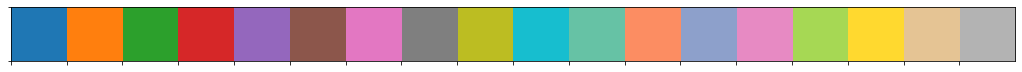

In [74]:
current_palette = sns.color_palette() + sns.color_palette("Set2")
#current_palette = sns.color_palette("Set2")#, 14)
sns.palplot(current_palette)

In [75]:
xs = []
ys = []
cs = []
fs = []
ws = []

for i in range(len(df_res)):
    row = df_res.iloc[i]
    node = row["node"]
    if pd.isnull(row["node"]):
        print(row)
    layer = int(row["level_1"])
    flow = row["flow"]
    x,y = pos[node]
    clr = current_palette[layer] if layer<len(current_palette) else "grey"
    xs.append(x)
    ys.append(y)
    cs.append(clr)
    fs.append(flow*20000)
    ws.append(layer)
    #break


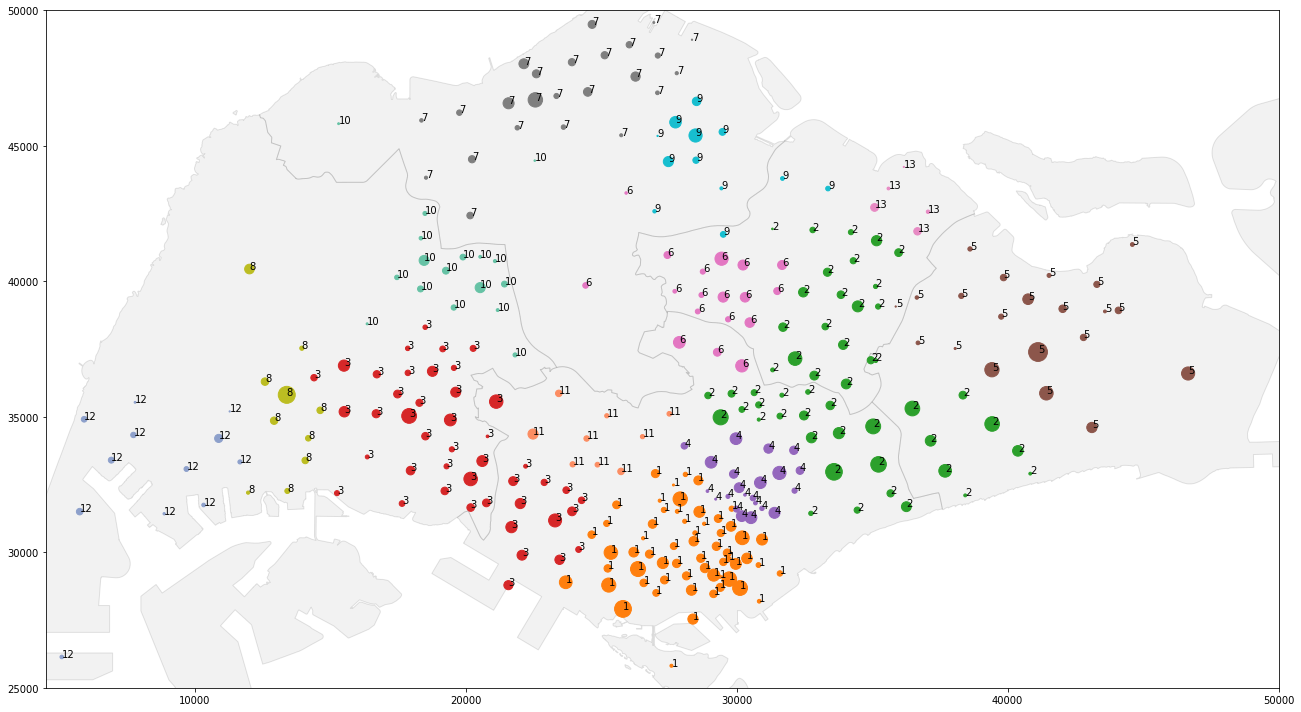

In [76]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect("equal")
region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.scatter(xs, ys, s=fs, color=cs)

for i, txt in enumerate(ws):
    ax.annotate(txt, (xs[i], ys[i]))
    
plt.tight_layout()

In [77]:
community = { k:l for k,l in zip(df_res["node"], df_res["level_1"]) }


In [78]:
dg2 = nx.DiGraph()
for u,v,d in dg1_08.edges(data=True):
    if d["weight"]==0: continue
    cu = community[u]
    cv = community[v]
    if dg2.has_edge(cu,cv):
        dg2[cu][cv]["weight"]+=d["weight"]
    else:
        dg2.add_edge(cu, cv, weight=d["weight"])
dg2.number_of_nodes(), dg2.number_of_edges()

(13, 169)

In [79]:
"""
def get_bridge(dg, community):
    potential_bridges = []
    for u, v in dg.edges(data=False):
        cu = community[u]
        cv = community[v]
        if cu!=cv:
            potential_bridge.append((u, v))
    return potential_bridges
"""

def get_pairs(cs1, cs2, dg):
    npairs = []
    inter_com = []
    for c1 in cs1:
        for c2 in cs2:
            if nx.has_path(dg, c1, c2):
                npairs.append((c1, c2))
                if dg.has_edge(c1, c2):
                    inter_com.append((c1, c2))
    return npairs, inter_com

def get_shortest_path(dg, npairs, weight=None):
    shortest_paths = []
    for c1, c2 in npairs:
        spath = nx.shortest_path(dg, c1, c2, weight=weight)
        shortest_paths.append(spath)
    return shortest_paths

def get_bridge_ness(inter_com, shortest_paths):
    bcount = { ic:0 for ic in inter_com }
    for spath in shortest_paths:
        for j in range(1, len(spath)):
            i = j - 1
            ed = (spath[i], spath[j])
            if ed in inter_com:
                bcount[ed]+=1
                #break
    df_bridge = pd.DataFrame.from_dict({"in_between": bcount}).reset_index().rename(columns={"level_0": "origin", "level_1": "destination"})
    #df_bridge = df_bridge[df_bridge["in_between"]>0]
    df_bridge = df_bridge.sort_values(by="in_between", ascending=False)
    return df_bridge

In [80]:
dg1_08b = nx.DiGraph()
for n in dg1_08.nodes():
    dg1_08b.add_node(n)

for u,v,d in dg1_08.edges(data=True):
    if d["weight"]>0:
        dg1_08b.add_edge(u, v, weight=1./d["weight"])

In [81]:
weight = "weight"

#potential_bridges = get_bridge(dg1b, community)
long_res = pd.DataFrame.from_dict({col:{} for col in ["com_direction", "from_com", "to_com", "origin", "destination", "in_between", "in_between_norm"]})
for com1, com2 in tqdm(dg2.edges()):
    # exist an edge between countries in com1 to countries in com2
    if com1==com2:
        continue
    #print(com1, com2)
    cs1 = df_res[df_res["level_1"]==com1]["node"].tolist()
    cs2 = df_res[df_res["level_1"]==com2]["node"].tolist()
    npairs, inter_com = get_pairs(cs1, cs2, dg1_08b)
    shortest_paths = get_shortest_path(dg1_08b, npairs, weight=weight)
    df_bridge = get_bridge_ness(inter_com, shortest_paths)
    inter_str = "{}-{}".format(com1, com2)
    df_bridge["com_direction"] = inter_str
    df_bridge["from_com"] = com1
    df_bridge["to_com"] = com2
    df_bridge["in_between_norm"] = df_bridge["in_between"] / (len(npairs))#-len(inter_com))
    df_bridge = df_bridge[["com_direction", "from_com", "to_com", "origin", "destination", "in_between", "in_between_norm"]]
    #print(df_bridge.head(10))
    long_res = long_res.append(df_bridge)
    #break
long_res = long_res.reset_index(drop=True)


100%|██████████| 169/169 [08:23<00:00,  2.98s/it]


In [92]:
cats = []
for ib in long_res["in_between_norm"]:
    #print(ib)
    cat = ""
    if ib<=0.2: cat = "weak"
    elif ib<=0.4: cat = "medium weak"
    elif ib<=0.6: cat = "medium strong"
    else: cat = "strong"
    cats.append(cat)
long_res["category"] = cats

In [93]:
long_res2 = long_res[long_res["in_between"]>0]

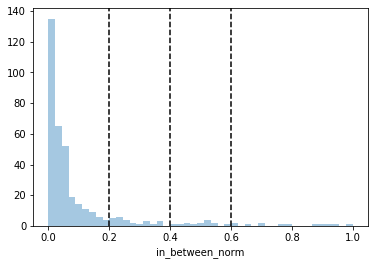

In [94]:
fig, ax = plt.subplots()
sns.distplot(long_res2["in_between_norm"], ax=ax, kde=False)#, bins=[i*0.05 for i in range(21)])
#ax.axvline(x=long_res2["in_between_norm"].mean(), ls="--", c="k")
#ax.axvline(x=long_res2["in_between_norm"].mean()+long_res2["in_between_norm"].std(), ls="--", c="k")
ax.axvline(x=0.6, ls="--", c="k")
ax.axvline(x=0.4, ls="--", c="k")
ax.axvline(x=0.2, ls="--", c="k")
#ax.set_xticks([i*0.1 for i in range(11)])

In [96]:
strong = long_res[long_res["category"]=="strong"]
mstrong = long_res[long_res["category"]=="medium strong"]
mweak = long_res[long_res["category"]=="medium weak"]

lines1 = list(zip(strong["origin"], strong["destination"]))
lines2 = list(zip(mstrong["origin"], mstrong["destination"]))
lines3 = list(zip(mweak["origin"], mweak["destination"]))
lines1

[('GALI BATU', 'JELEBU'),
 ('BENDEMEER', 'TAMPINES WEST'),
 ('BALESTIER', 'TYERSALL'),
 ('HONG KAH', 'JURONG WEST CENTRAL'),
 ('ANAK BUKIT', 'UPPER THOMSON'),
 ('CHOA CHU KANG CENTRAL', 'WESTERN WATER CATCHMENT'),
 ('SENGKANG TOWN CENTRE', 'PUNGGOL FIELD'),
 ('TAMPINES EAST', 'YISHUN WEST'),
 ('MATILDA', 'TAMPINES WEST'),
 ('JURONG WEST CENTRAL', 'HONG KAH'),
 ('JURONG WEST CENTRAL', 'JOO KOON'),
 ('WESTERN WATER CATCHMENT', 'CHOA CHU KANG CENTRAL')]

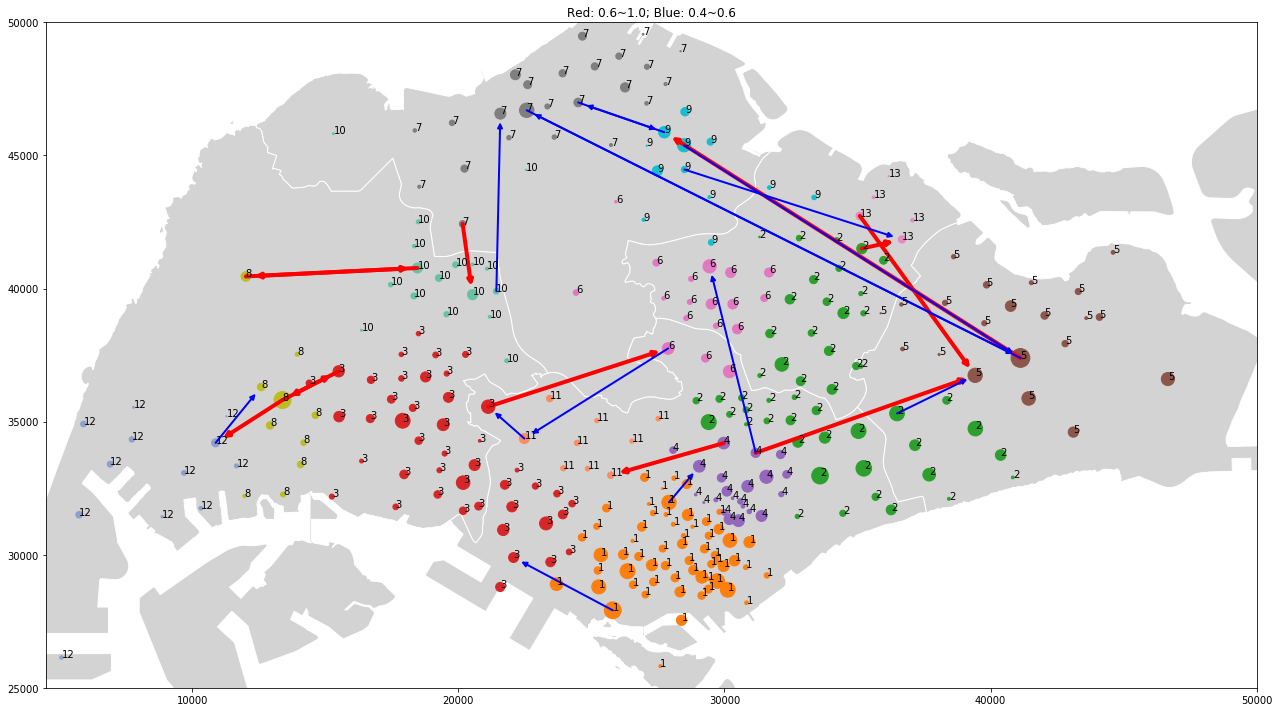

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
region.plot(fc="lightgrey", ec="w", ax=ax)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])

#ax.scatter(nodes["lon"], nodes["lat"], s=nodes["flow"]*5000, c=[ color_map[g] if g in color_map else "k" for g in nodes["level_1_layer"] ])

ax.scatter(xs, ys, s=fs, color=cs)

for i, txt in enumerate(ws):
    ax.annotate(txt, (xs[i], ys[i]))
    
    
nx.draw_networkx_edges(dg1_08b, edgelist=lines1, pos=pos, width=4, edge_color="r")
nx.draw_networkx_edges(dg1_08b, edgelist=lines2, pos=pos, width=2, edge_color="b")
#nx.draw_networkx_edges(dg1b, edgelist=lines3, pos=pos, width=1, edge_color="k")
ax.set_title("Red: 0.6~1.0; Blue: 0.4~0.6")

plt.tight_layout()